In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import data_handling, exploratory_data_analysis
from ipywidgets import interact

## Setup visualization settings

In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

## Load and group data according to cell labels and cell types

In [3]:
categories = ['mono-functional', 'mono-marginally-defective', 'mono-defective', 
    'poly-functional','poly-marginally-defective', 'poly-defective']
    
cell_images, cell_labels, cell_types = data_handling.load_data_from_file('../data/labels.csv')

mono_functional = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.0, 'mono')
mono_defective = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 1.0, 'mono')
mono_marginally_defective = np.concatenate(\
    (data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.3333333333333333, 'mono'), 
    data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.6666666666666666, 'mono')), axis = 0)

poly_functional = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.0, 'poly')
poly_defective = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 1.0, 'poly')
poly_marginally_defective = np.concatenate(\
    (data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.3333333333333333, 'poly'), 
    data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.6666666666666666, 'poly')), axis = 0)

print([mono_functional.shape, mono_marginally_defective.shape, mono_defective.shape])
print([poly_functional.shape, poly_marginally_defective.shape, poly_defective.shape])

[(588, 300, 300), (173, 300, 300), (313, 300, 300)]
[(920, 300, 300), (228, 300, 300), (402, 300, 300)]


## Load and group data according to cell types only

In [4]:
functional = np.concatenate((mono_functional, poly_functional), axis = 0)
defective = np.concatenate(\
    (mono_defective, mono_marginally_defective, poly_defective, poly_marginally_defective), axis = 0)
print([functional.shape, defective.shape])


[(1508, 300, 300), (1116, 300, 300)]


## Compute statistical parameters (mean, median, std, max, min, mode)

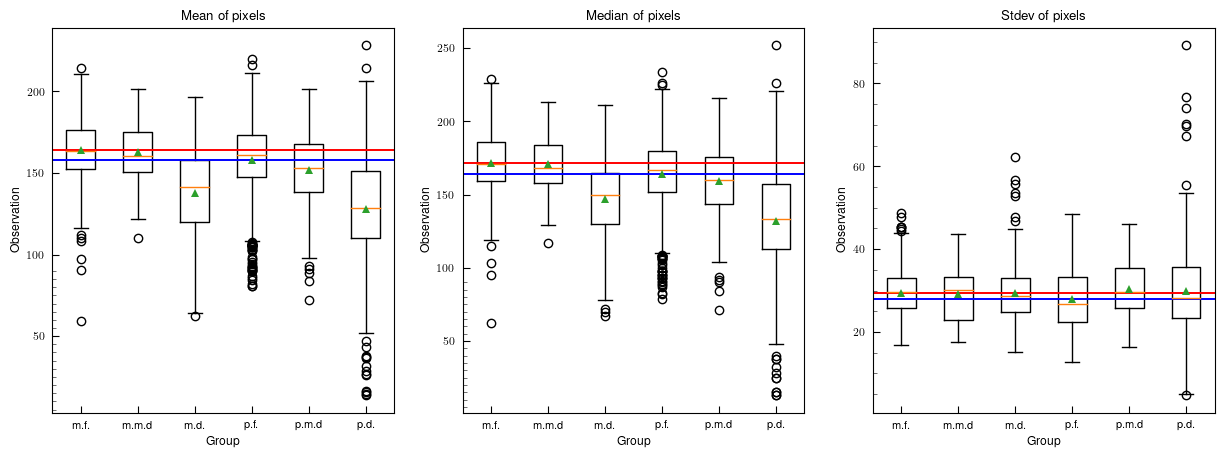

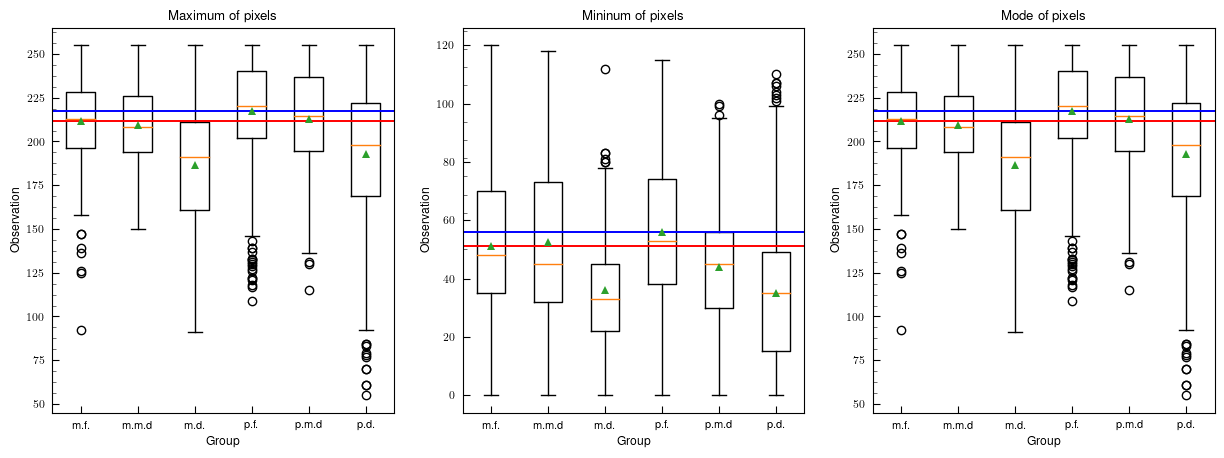

In [5]:
mono_functional_stats = exploratory_data_analysis.compute_statistical_parameters(mono_functional)
mono_marginally_defective_stats = exploratory_data_analysis.compute_statistical_parameters(mono_marginally_defective)
mono_defective_stats = exploratory_data_analysis.compute_statistical_parameters(mono_defective)

poly_functional_stats = exploratory_data_analysis.compute_statistical_parameters(poly_functional)
poly_marginally_defective_stats = exploratory_data_analysis.compute_statistical_parameters(poly_marginally_defective)
poly_defective_stats = exploratory_data_analysis.compute_statistical_parameters(poly_defective)

means = [\
    mono_functional_stats[0], mono_marginally_defective_stats[0], mono_defective_stats[0],
    poly_functional_stats[0], poly_marginally_defective_stats[0], poly_defective_stats[0]]
medians = [\
    mono_functional_stats[1], mono_marginally_defective_stats[1], mono_defective_stats[1],
    poly_functional_stats[1], poly_marginally_defective_stats[1], poly_defective_stats[1]]
stds = [\
    mono_functional_stats[2], mono_marginally_defective_stats[2], mono_defective_stats[2],
    poly_functional_stats[2], poly_marginally_defective_stats[2], poly_defective_stats[2]]
maxs = [\
    mono_functional_stats[3], mono_marginally_defective_stats[3], mono_defective_stats[3],
    poly_functional_stats[3], poly_marginally_defective_stats[3], poly_defective_stats[3]]
mins = [\
    mono_functional_stats[4], mono_marginally_defective_stats[4], mono_defective_stats[4],
    poly_functional_stats[4], poly_marginally_defective_stats[4], poly_defective_stats[4]]
modes = [\
    mono_functional_stats[3], mono_marginally_defective_stats[3], mono_defective_stats[3],
    poly_functional_stats[3], poly_marginally_defective_stats[3], poly_defective_stats[3]
    ]

parameters = [means, medians, stds, maxs, mins, modes]
names = ['Mean of pixels', 'Median of pixels', 'Stdev of pixels', 
    'Maximum of pixels', 'Mininum of pixels', 'Mode of pixels']
legends = ['m.f.', 'm.m.d', 'm.d.',
    'p.f.', 'p.m.d', 'p.d.']

fig, axs = plt.subplots(1, 3, figsize = (15, 5))
for idx in range(3):
    axs[idx].boxplot(parameters[idx], showmeans = True)
    axs[idx].axhline(np.mean(parameters[idx][0]), color = 'red')
    axs[idx].axhline(np.mean(parameters[idx][3]), color = 'blue')
    axs[idx].set_xlabel('Group')
    axs[idx].set_ylabel('Observation')
    axs[idx].set_title(names[idx])
    axs[idx].xaxis.set_minor_locator(minor_locator)
    axs[idx].yaxis.set_minor_locator(minor_locator)
    axs[idx].set_xticks([1,2,3,4,5,6], legends)
    plt.tight_layout
plt.show()

fig, axs = plt.subplots(1, 3, figsize = (15, 5))
for idx in range(3):
    axs[idx].boxplot(parameters[idx + 3], showmeans = True)
    axs[idx].axhline(np.mean(parameters[idx + 3][0]), color = 'red')
    axs[idx].axhline(np.mean(parameters[idx + 3][3]), color = 'blue')  
    axs[idx].set_xlabel('Group')
    axs[idx].set_ylabel('Observation')
    axs[idx].set_title(names[idx + 3])
    axs[idx].xaxis.set_minor_locator(minor_locator)
    axs[idx].yaxis.set_minor_locator(minor_locator)
    axs[idx].set_xticks([1,2,3,4,5,6], legends)
    plt.tight_layout
plt.show()

## Compute average images

In [ ]:
mono_functional_average = exploratory_data_analysis.compute_average_image(mono_functional)
mono_marginally_defective_average = exploratory_data_analysis.compute_average_image(mono_marginally_defective)
mono_defective_average = exploratory_data_analysis.compute_average_image(mono_defective)

poly_functional_average = exploratory_data_analysis.compute_average_image(poly_functional)
poly_marginally_defective_average = exploratory_data_analysis.compute_average_image(poly_marginally_defective)
poly_defective_average = exploratory_data_analysis.compute_average_image(poly_defective)

average_images = [mono_functional_average, mono_marginally_defective_average, mono_defective_average, 
    poly_functional_average, poly_marginally_defective_average, poly_marginally_defective_average]

fig, axs = plt.subplots(1, 3, figsize = (15,10))
for jdx in range(3):
    axs[jdx].imshow(average_images[jdx], cmap = 'gray')
    axs[jdx].set_title(f'Average image for {categories[jdx]} category')
    axs[jdx].set_xlabel('Width [px]')
    axs[jdx].set_ylabel('Height [px]')
    plt.tight_layout()

fig, axs = plt.subplots(1, 3, figsize = (15,10))
for jdx in range(3):
    axs[jdx].imshow(average_images[jdx + 3], cmap = 'gray')
    axs[jdx].set_title(f'Average image for {categories[jdx + 3]} category')
    axs[jdx].set_xlabel('Width [px]')
    axs[jdx].set_ylabel('Height [px]')
    plt.tight_layout()

## Compute contrast images

In [ ]:
mono_contrast = [np.subtract(mono_functional_average, mono_marginally_defective_average) ** 2, 
    np.subtract(mono_functional_average, mono_defective_average) ** 2]
poly_contrast = [np.subtract(poly_functional_average, poly_marginally_defective_average) ** 2, 
    np.subtract(poly_functional_average, poly_defective_average) ** 2]

fig, axs = plt.subplots(1, 2, figsize = (15,10))
axs[0].imshow(mono_contrast[0], cmap = 'jet')
axs[0].set_title(f'Contrast between {categories[0]} and {categories[1]}')
axs[0].set_xlabel('Width [px]')
axs[0].set_ylabel('Height [px]')
axs[1].imshow(mono_contrast[1], cmap = 'jet')
axs[1].set_title(f'Contrast between {categories[0]} and {categories[2]}')
axs[1].set_xlabel('Width [px]')
axs[1].set_ylabel('Height [px]')
plt.tight_layout()

fig, axs = plt.subplots(1, 2, figsize = (15,10))
axs[0].imshow(poly_contrast[0], cmap = 'jet')
axs[0].set_title(f'Contrast between {categories[3]} and {categories[4]}')
axs[0].set_xlabel('Width [px]')
axs[0].set_ylabel('Height [px]')
axs[1].imshow(poly_contrast[1], cmap = 'jet')
axs[1].set_title(f'Contrast between {categories[3]} and {categories[5]}')
axs[1].set_xlabel('Width [px]')
axs[1].set_ylabel('Height [px]')
plt.tight_layout()

## Compute and visualize image embeddings

In [ ]:
cell_images_embeddings, cell_classes = \
    exploratory_data_analysis.compute_image_embeddings_PCA(cell_images, cell_labels, cell_types, 2)

fig, axs = plt.subplots(1, 1, figsize = (15, 10))
scatter = axs.scatter(cell_images_embeddings[:, 0], cell_images_embeddings[:, 1], s = 15, 
    cmap = plt.cm.get_cmap('jet', 6), c = cell_classes)
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')
axs.xaxis.set_minor_locator(minor_locator)
axs.yaxis.set_minor_locator(minor_locator)
handles, labels = scatter.legend_elements()
legends = axs.legend(handles, labels, )
axs.add_artist(legends)

cell_images_embeddings, cell_classes = \
    exploratory_data_analysis.compute_image_embeddings_tSNE(cell_images, cell_labels, cell_types)

fig, axs = plt.subplots(1, 1, figsize = (15, 10))
scatter = axs.scatter(cell_images_embeddings[:, 0], cell_images_embeddings[:, 1], s = 15, 
    cmap = plt.cm.get_cmap('jet', 6), c = cell_classes)
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')
axs.xaxis.set_minor_locator(minor_locator)
axs.yaxis.set_minor_locator(minor_locator)
handles, labels = scatter.legend_elements()
legends = axs.legend(handles, labels, )
axs.add_artist(legends)